# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [59]:
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# 2. Collect and load data

In [2]:
city=pd.read_csv('bigcity.csv')

In [3]:
city.set_index('Unnamed: 0',inplace=True)



In [4]:
city.head()

,u,x
Unnamed: 0,,
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


In [5]:
city.shape

(49, 2)

# 3. Explore numeric variables - five number summary

In [6]:
city.dtypes

u    int64
x    int64
dtype: object

In [7]:
Q1=city.quantile(0.25)
Q3=city.quantile(0.75)

IQR=Q3-Q1
print(IQR)

u    77.0
x    72.0
dtype: float64


In [8]:
city = city[~((city < (Q1 - 1.5 * IQR)) | (city > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
city.shape

(42, 2)

In [10]:
#Since the dimensions are reduced that implies outliers are removed

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

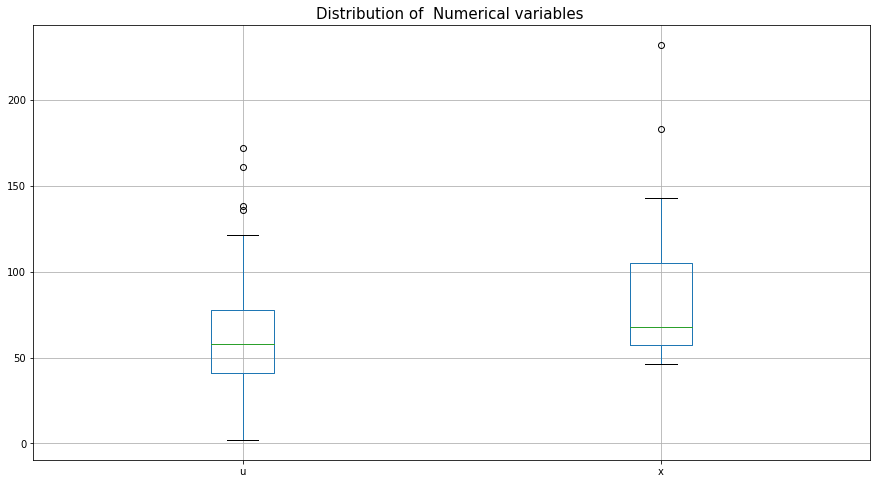

In [11]:
plt.figure(figsize=(15,8))

city.boxplot()

plt.title('Distribution of  Numerical variables ', fontsize = 15)

plt.show()

<Figure size 1080x576 with 0 Axes>

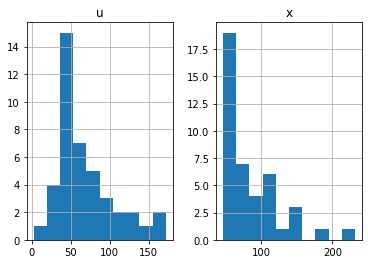

In [12]:
plt.figure(figsize=(15,8))

city.hist()

plt.show()

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

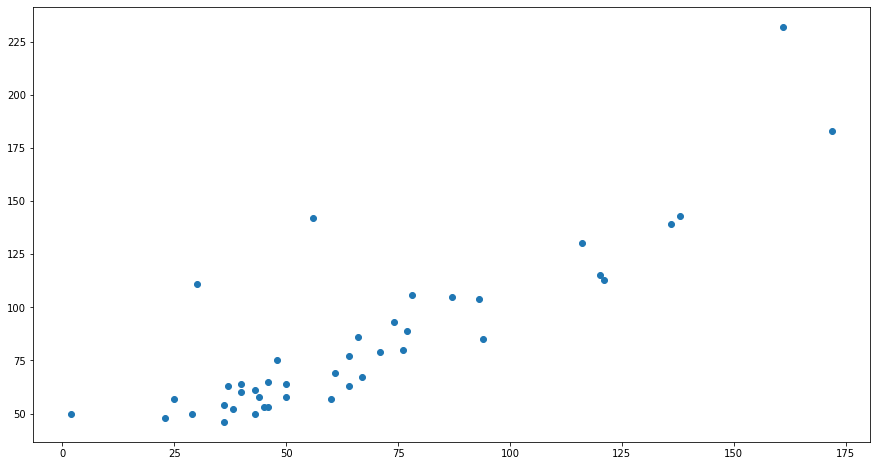

In [13]:
plt.figure(figsize=(15,8))

plt.scatter(x='u',y='x',data=city)

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [14]:
city.skew()

u    1.104970
x    1.809231
dtype: float64

In [15]:
X=city.drop('x',axis=1)

Y=city['x']

X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size = 0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33, 2)
(9, 2)
(33,)
(9,)


In [17]:
##np.sqrt(Y_train).head()

In [18]:
#reciprocal transformation
(1 / Y_train).head()

Unnamed: 0
28    0.007194
27    0.016667
41    0.015873
35    0.008696
42    0.007042
Name: x, dtype: float64

In [19]:
#As the reciprocal transformation brought the skewness to the minimal level hence it can be applied to the data

In [20]:
##np.log(Y_train).head()

In [21]:
##stats.boxcox(Y_train)[0][0:5]

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33, 2)
(9, 2)
(33,)
(9,)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [23]:
city.isnull().sum()

u    0
x    0
dtype: int64

<AxesSubplot:>

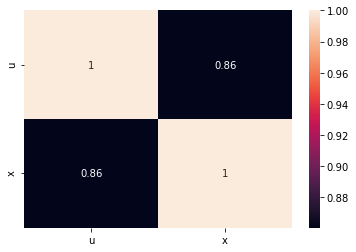

In [24]:
sns.heatmap(city.corr(),annot=True)

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [25]:
X_train,X_test,Y_train,Y_test= train_test_split(city['u'], city['x'],random_state=1, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33,)
(9,)
(33,)
(9,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [26]:
X_train = pd.DataFrame(X_train)

c = np.ones(X_train.shape[0])

X_train.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train.head()

,intercept,u
Unnamed: 0,,
28,1.0,136
27,1.0,40
41,1.0,64
35,1.0,120
42,1.0,56


In [27]:
SLR_model = sm.OLS(Y_train, X_train).fit()

print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     97.15
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           4.52e-11
Time:                        17:58:26   Log-Likelihood:                -147.43
No. Observations:                  33   AIC:                             298.9
Df Residuals:                      31   BIC:                             301.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.6706      7.258      3.537      0.0

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [28]:
X= city.drop('x',axis=1)

Y=city['x']

X=sm.add_constant(X)

MLR_model=sm.OLS(Y,X).fit()

In [29]:
MLR_model.params



const    25.048091
u         0.890824
dtype: float64

In [30]:
residuals=MLR_model.resid

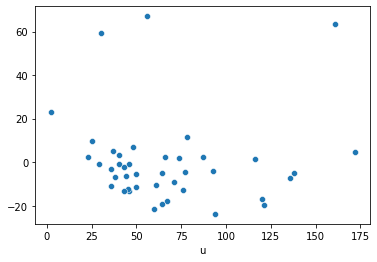

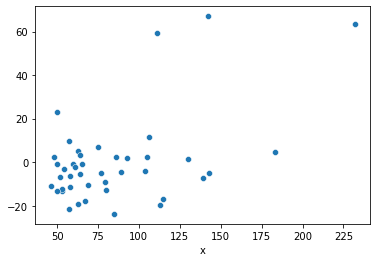

In [36]:
sns.scatterplot(data=city,x='u',y=residuals)
plt.show()
sns.scatterplot(data=city,x='x',y=residuals)
plt.show()

In [ ]:
# The above structures show that there is no linear relationship between feature and target


# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [51]:
X = city.drop('x',axis=1)

y = city['x']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [52]:
linreg = LinearRegression()

In [53]:
MLR_model = linreg.fit(X_train, y_train)

train_pred = MLR_model.predict(X_train)

mse_train = mean_squared_error(y_train, train_pred)

rmse_train = round(np.sqrt(mse_train), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
test_pred = MLR_model.predict(X_test)

mse_test = mean_squared_error(y_test, test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  18.2898
Root Mean Squared Error (RMSE) on test set:  25.7981


In [54]:
MLR_model.coef_

array([0.95682679])

In [56]:
r_sq = MLR_model.score(X_train, y_train)
print(r_sq)

0.8159534889511881


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [62]:
kf=KFold(n_splits=15,shuffle=True,random_state=0)
rmse=cross_val_score(linreg,X,y,cv=kf,scoring='neg_root_mean_squared_error')
linreg_be=np.mean(np.abs(rmse))
linreg_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_error',linreg_be)
print('VAR_error',linreg_ve)

Bias_error 16.750397770820193
VAR_error 15.977036525080157
